In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AR
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
%matplotlib inline

In [3]:
df = pd.read_csv('datasets/covid_19_data.csv', parse_dates=['Last Update'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region' : 'Country'}, inplace=True)
df_date = df.groupby(['Date'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [4]:
date_confirmed = df_date[['Date', 'Confirmed']]
date_death = df_date[['Date', 'Deaths']]
date_recovered = df_date[['Date', 'Recovered']]

print(date_death)

          Date  Deaths
0   01/22/2020    17.0
1   01/23/2020    18.0
2   01/24/2020    26.0
3   01/25/2020    42.0
4   01/26/2020    56.0
5   01/27/2020    82.0
6   01/28/2020   131.0
7   01/29/2020   133.0
8   01/30/2020   171.0
9   01/31/2020   213.0
10  02/01/2020   259.0
11  02/02/2020   362.0
12  02/03/2020   426.0
13  02/04/2020   492.0
14  02/05/2020   564.0
15  02/06/2020   634.0
16  02/07/2020   719.0
17  02/08/2020   806.0
18  02/09/2020   906.0
19  02/10/2020  1013.0
20  02/11/2020  1113.0
21  02/12/2020  1118.0
22  02/13/2020  1371.0
23  02/14/2020  1523.0
24  02/15/2020  1666.0
25  02/16/2020  1770.0
26  02/17/2020  1868.0
27  02/18/2020  2007.0
28  02/19/2020  2122.0
29  02/20/2020  2247.0
30  02/21/2020  2251.0
31  02/22/2020  2458.0
32  02/23/2020  2469.0
33  02/24/2020  2629.0
34  02/25/2020  2708.0
35  02/26/2020  2770.0
36  02/27/2020  2814.0
37  02/28/2020  2872.0
38  02/29/2020  2941.0
39  03/01/2020  2996.0
40  03/02/2020  3085.0
41  03/03/2020  3160.0
42  03/04/2

In [6]:
for index,row in date_confirmed.iterrows():
    if row['Confirmed'] is None:
        row['Confirmed'] = 0.0

for index, row in date_death.iterrows():
    if row['Deaths'] is None:
        row['Deaths'] = 0.0

for index, row in date_recovered.iterrows():
    if row['Recovered'] is None:
        row['Recovered'] = 0.0

In [9]:
#AR Model fitting for confirmed cases
model_ar_confirmed = AR(np.asanyarray(date_confirmed['Confirmed']))
model_fit_ar_confirmed = model_ar_confirmed.fit()

In [12]:
#AR Model prediction for confirmed cases
predict_ar_confirmed = model_fit_ar_confirmed.predict(10, len(date_confirmed) + 40)
print(predict_ar_confirmed)

[  11076.19405671   13650.51997886   19064.1491858    22634.81772535
   27135.51435124   30909.84119006   34247.23258992   37608.54450971
   40250.03649894   43203.09020981   45613.71504421   47505.77862569
   47169.4973608    66337.41167226   73302.60629243   75686.32858839
   75639.04427275   77499.84747217   77692.0673962    77845.73465068
   78126.28985006   78511.28006758   80576.93748496   80728.93793304
   81409.39136629   82123.79337936   83290.18299128   84714.56420497
   86324.23379965   88492.4199588    91176.62908014   93282.11451967
   96063.36311512   98417.71453945  101442.54236518  105781.9448162
  110349.35543051  114681.97163264  118569.43695269  124030.63088054
  132275.8606599   134210.92893125  154977.60613353  166685.44784925
  180305.45038598  194441.64546406  209064.70873501  223658.37260574
  239181.95539181  255666.11588099  272846.36572359  291169.49939927
  310474.52921234  330977.5658719   352742.33744615  375841.21453424
  400416.86590923  426545.35790654 

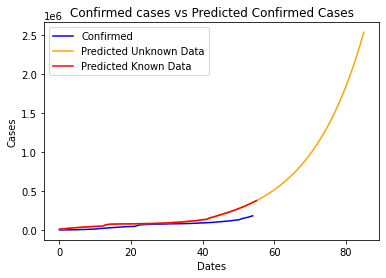

In [13]:
#AR Plot of Confirmed
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(date_confirmed['Confirmed'], label='Confirmed', color='blue')
plt.plot(predict_ar_confirmed, label='Predicted Unknown Data', color='orange')
plt.plot(predict_ar_confirmed[:len(predict_ar_confirmed)-30], label='Predicted Known Data', color='red')
plt.title('Confirmed cases vs Predicted Confirmed Cases')
plt.legend()
plt.show()

In [14]:
#AR Model fitting  and prediciton for death cases
model_ar_death = AR(np.asanyarray(date_death['Deaths']))
model_fit_ar_death = model_ar_death.fit()
predict_ar_death = model_fit_ar_death.predict(10, len(date_death) + 40)
print(predict_ar_death)

[2.35417643e+02 3.04616676e+02 3.86411598e+02 4.91873240e+02
 5.81265647e+02 6.59734226e+02 7.37711810e+02 8.05683230e+02
 8.69115541e+02 9.60905807e+02 1.10145790e+03 1.22551839e+03
 1.25120983e+03 1.39920749e+03 1.67332766e+03 1.87150047e+03
 1.90878692e+03 2.06738648e+03 2.21122104e+03 2.27775946e+03
 2.27698591e+03 2.34089162e+03 2.49142243e+03 2.62788732e+03
 2.72092688e+03 2.76346304e+03 2.91618104e+03 2.92166508e+03
 2.97078245e+03 2.98288812e+03 3.07362043e+03 3.10338604e+03
 3.25000809e+03 3.38771654e+03 3.49759528e+03 3.61979578e+03
 3.73461452e+03 3.95928151e+03 4.24657150e+03 4.56204751e+03
 4.93929804e+03 5.24687450e+03 5.73489510e+03 6.42954193e+03
 7.12554827e+03 7.78461053e+03 8.74615769e+03 9.74508497e+03
 1.09101108e+04 1.20958018e+04 1.35232035e+04 1.50707608e+04
 1.68558031e+04 1.88302786e+04 2.09125757e+04 2.33088562e+04
 2.59137003e+04 2.88515946e+04 3.20597687e+04 3.55728048e+04
 3.94504641e+04 4.37402154e+04 4.85018166e+04 5.37148907e+04
 5.94731793e+04 6.579669

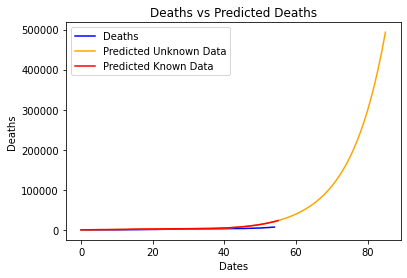

In [15]:
#AR Plot of Deaths
plt.xlabel('Dates')
plt.ylabel('Deaths')
plt.plot(date_death['Deaths'], label='Deaths', color='blue')
plt.plot(predict_ar_death, label='Predicted Unknown Data', color='orange')
plt.plot(predict_ar_death[:len(predict_ar_death)-30], label='Predicted Known Data', color='red')
plt.title('Deaths vs Predicted Deaths')
plt.legend()
plt.show()

In [16]:
#AR Model fitting  and prediciton for recovered cases
model_ar_recovered = AR(np.asanyarray(date_recovered['Recovered']))
model_fit_ar_recovered = model_ar_recovered.fit()
predict_ar_recovered = model_fit_ar_recovered.predict(10, len(date_death) + 40)
print(predict_ar_recovered)

[   583.45719051    659.7564346     866.00637141   1083.00060865
   1351.01069522   1655.29233261   2039.65421372   2627.95093161
   3341.84962158   4107.9856844    4866.63886231   5621.81500394
   6122.05133699   7113.54679123   8990.57003484  10942.39861889
  12761.0889209   14352.96545132  15999.68612966  17852.04687233
  20019.74720143  20996.77948684  24255.04876365  25761.87716403
  27431.56940396  29683.87773615  32083.7138907   35880.72882621
  39523.86611925  43216.6800986   45962.45168698  48630.69634076
  51032.74622787  53724.93488204  56438.27724812  58648.79521312
  60827.20916724  62966.14086198  64889.61957405  66678.38936304
  69018.67477396  70664.15723808  72438.39970579  74630.34010655
  78125.50681286  81205.73259253  84379.33376644  87503.89098613
  90527.49441079  93877.02857614  97143.19716299 100522.38865853
 103843.87193926 107340.85309412 110844.17081117 114399.88277671
 118008.89526733 121719.71471392 125460.70118872 129283.78613617
 133170.92360924 137140.3

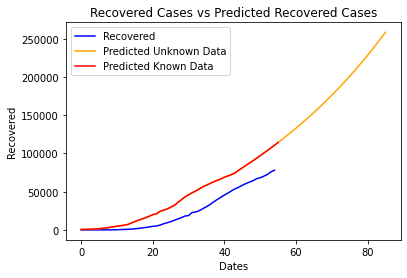

In [17]:
#AR Plot of Recovered
plt.xlabel('Dates')
plt.ylabel('Recovered')
plt.plot(date_recovered['Recovered'], label='Recovered', color='blue')
plt.plot(predict_ar_recovered, label='Predicted Unknown Data', color='orange')
plt.plot(predict_ar_recovered[:len(predict_ar_recovered)-30], label='Predicted Known Data', color='red')
plt.title('Recovered Cases vs Predicted Recovered Cases')
plt.legend()
plt.show()

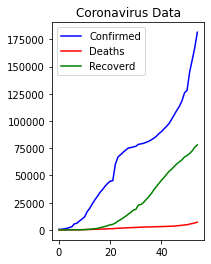

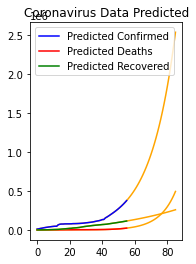

In [19]:
plt.subplot(121)
plt.title('Coronavirus Data')
plt.plot(date_confirmed['Confirmed'], label='Confirmed', color='blue')
plt.plot(date_death['Deaths'], label='Deaths', color='red')
plt.plot(date_recovered['Recovered'], label='Recoverd', color='green')
plt.legend()
plt.show()
plt.subplot(122)
plt.title('Coronavirus Data Predicted')
plt.plot(predict_ar_confirmed, color='orange')
plt.plot(predict_ar_confirmed[:len(predict_ar_confirmed)-30], label='Predicted Confirmed', color='blue')

plt.plot(predict_ar_death, color='orange')
plt.plot(predict_ar_death[:len(predict_ar_death)-30], label='Predicted Deaths', color='red')

plt.plot(predict_ar_recovered, color='orange')
plt.plot(predict_ar_recovered[:len(predict_ar_recovered)-30], label='Predicted Recovered', color='green')
plt.legend()
plt.show()




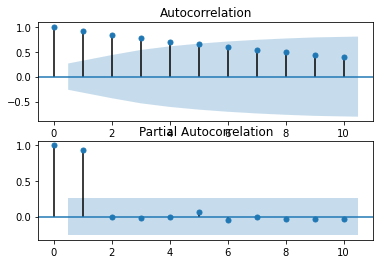

In [20]:
#ACF(Autocorrelation) and PACF(Partial Autocorrelation) graphics determining the values of the parameters of the ARMA/ARIMA/SARIMA models.
fig = plt.figure()
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(date_confirmed['Confirmed'], lags=10, ax=ax1) 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(date_confirmed['Confirmed'], lags=10, ax=ax2)
plt.show()